In [169]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


In [170]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load Test

In [171]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [172]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [175]:
train_data.insert(loc=len(train_data.columns), column="Deck", value="")
test_data.insert(loc=len(test_data.columns), column="Deck", value="")

train_data['Deck'] = train_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")
test_data['Deck'] = test_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else "U")


In [176]:
print(train_data["Deck"].isna().sum())
print(test_data["Deck"].isna().sum())


0
0


In [177]:
train_data["Deck"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [178]:
most_common_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_common_embarked)

train_data.drop(columns=['PassengerId'], inplace=True)
test_data.drop(columns=['PassengerId'], inplace=True)

In [179]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,U
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,U
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,U
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [180]:
test_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Deck          0
dtype: int64

In [181]:
print(train_data.isna().sum().sum())
print(test_data.isna().sum().sum())

864
414


In [182]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck'], dtype='object')


In [183]:
print(train_data.select_dtypes(include=['object']).columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck'], dtype='object')


Survived
0    549
1    342
Name: count, dtype: int64


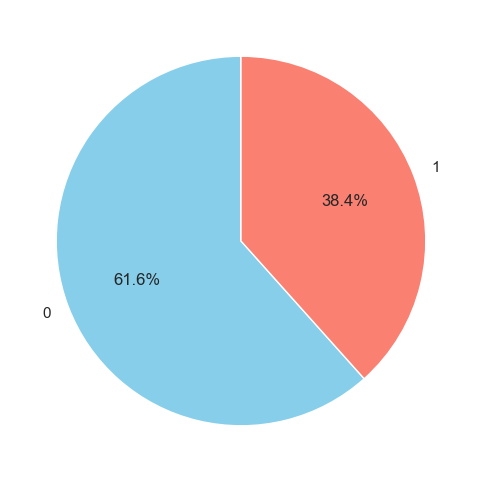

In [184]:
counts = train_data["Survived"].value_counts()
print(counts)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.show()

In [185]:
deckCounts = {}
for i in train_data["Deck"]:
    deckCounts[i] = deckCounts.get(i, 0) + 1

deckCounts


{'U': 687,
 'C': 59,
 'E': 32,
 'G': 4,
 'D': 33,
 'A': 15,
 'B': 47,
 'F': 13,
 'T': 1}

In [186]:
train_data["Pclass"].unique()

array([3, 1, 2])

In [187]:
pclass_survive = pd.crosstab(train_data["Deck"], train_data["Survived"])
pclass_survive

Survived,0,1
Deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


In [188]:
pclass_long = (
    pclass_survive
    .reset_index()               
    .melt(id_vars="Deck",        
          var_name="Survived",   
          value_name="Count") 
)
pclass_long.head()

,Deck,Survived,Count
0,A,0,8
1,B,0,12
2,C,0,24
3,D,0,8
4,E,0,8


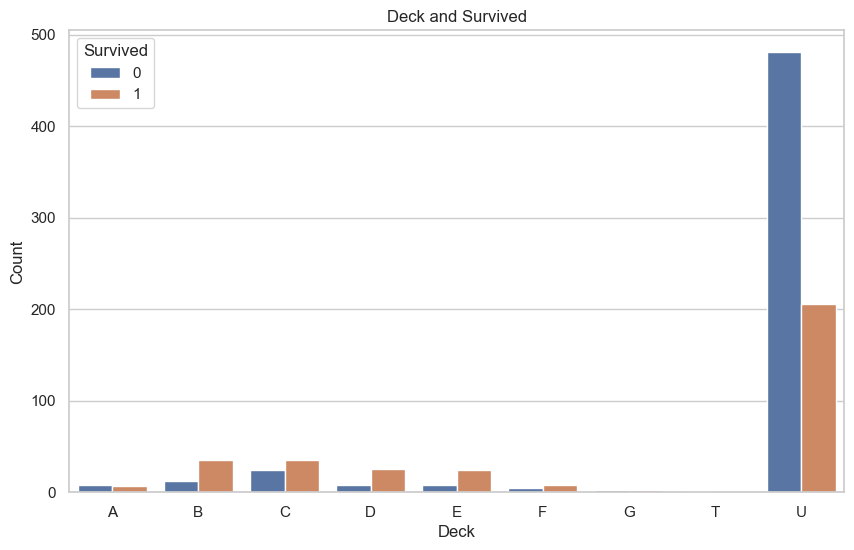

In [189]:
plt.figure(figsize=(10,6))
sns.barplot(data=pclass_long, x="Deck", y="Count", hue="Survived")

plt.title("Deck and Survived")
plt.ylabel("Count")
plt.xlabel("Deck")
plt.legend(title="Survived")
plt.show()

In [190]:
# Output percentage
pclass_survive_percentage = pclass_survive.div(pclass_survive.sum(axis=1), axis=0) * 100
pclass_survive_percentage

Survived,0,1
Deck,,
A,53.333333,46.666667
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
U,70.014556,29.985444


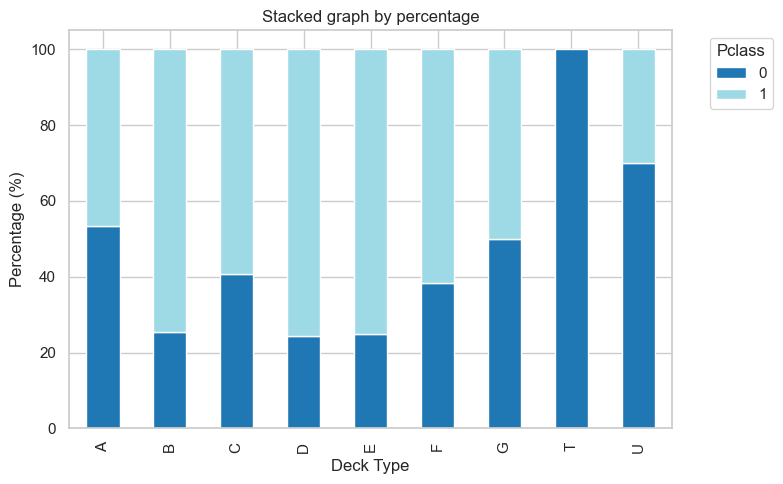

In [191]:
sns.set_theme(style="whitegrid")
ax = pclass_survive_percentage.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab20")

plt.ylabel("Percentage (%)")
plt.xlabel("Deck Type")
plt.title("Stacked graph by percentage")
plt.legend(title="Pclass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [192]:
pclass_deck = pd.crosstab(train_data["Deck"], train_data["Pclass"])
pclass_deck

Pclass,1,2,3
Deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
T,1,0,0
U,40,168,479


In [193]:
# Output percentage
pclass_deck_percentage = pclass_deck.div(pclass_deck.sum(axis=1), axis=0) * 100
pclass_deck_percentage

Pclass,1,2,3
Deck,,,
A,100.000000,0.000000,0.000000
B,100.000000,0.000000,0.000000
C,100.000000,0.000000,0.000000
D,87.878788,12.121212,0.000000
E,78.125000,12.500000,9.375000
F,0.000000,61.538462,38.461538
G,0.000000,0.000000,100.000000
T,100.000000,0.000000,0.000000
U,5.822416,24.454148,69.723435


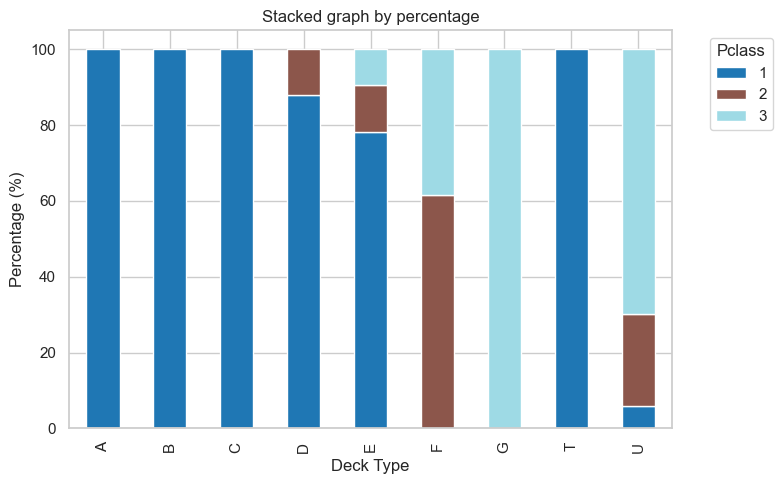

In [194]:
sns.set_theme(style="whitegrid")
ax = pclass_deck_percentage.plot(kind="bar", stacked=True, figsize=(8,5), colormap="tab20")

plt.ylabel("Percentage (%)")
plt.xlabel("Deck Type")
plt.title("Stacked graph by percentage")
plt.legend(title="Pclass", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [195]:
train_data["Deck"] = train_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
train_data["Deck"] = train_data["Deck"].replace(["D", "E"], "Group 2")
train_data["Deck"] = train_data["Deck"].replace(["F", "G"], "Group 3")
train_data["Deck"] = train_data["Deck"].replace(["U"], "Group 4")

test_data["Deck"] = test_data["Deck"].replace(["A", "B", "C", "T"], "Group 1")
test_data["Deck"] = test_data["Deck"].replace(["D", "E"], "Group 2")
test_data["Deck"] = test_data["Deck"].replace(["F", "G"], "Group 3")
test_data["Deck"] = test_data["Deck"].replace(["U"], "Group 4")

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Group 4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Group 1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Group 4
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Group 1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Group 4


In [196]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [197]:
train_data["Title"] = train_data["Name"].str.extract(r",\s*([^\.]*)\.")
test_data["Title"] = test_data["Name"].str.extract(r",\s*([^\.]*)\.")

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_1128\2432131351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")


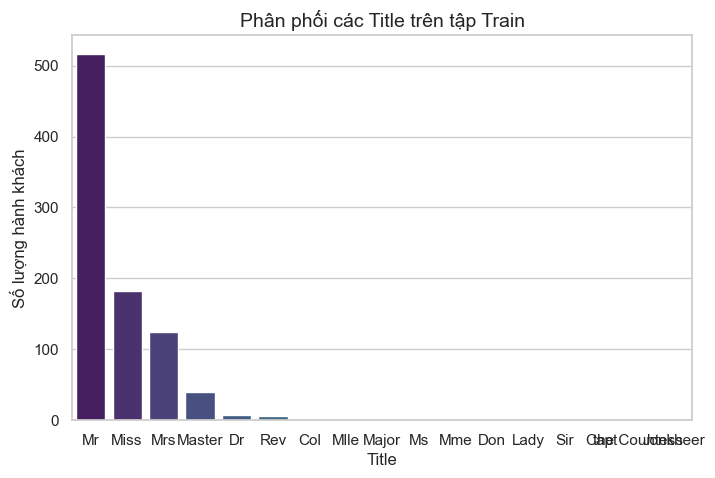

In [198]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="Title", order=train_data["Title"].value_counts().index, palette="viridis")

plt.title("Phân phối các Title trên tập Train", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.show()

In [199]:
train_data['Title'] = train_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train_data['Title'] = train_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')
test_data['Title'] = test_data['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
test_data['Title'] = test_data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_1128\3021317157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")


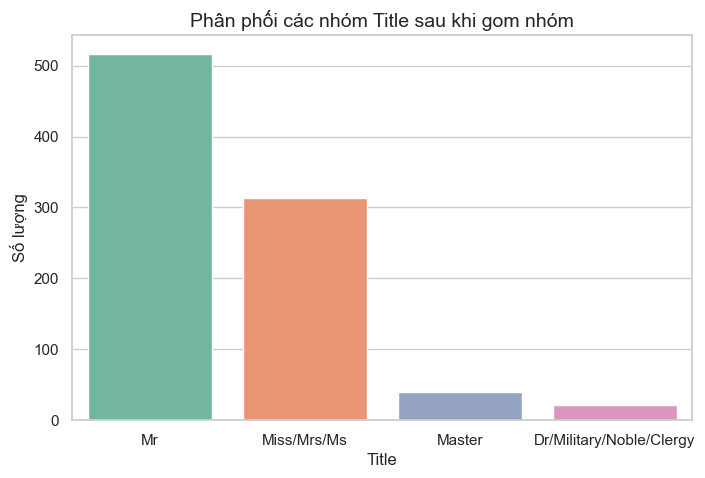

In [200]:
plt.figure(figsize=(8,5))
sns.countplot(x="Title", data=train_data, order=train_data["Title"].value_counts().index, palette="Set2")
plt.title("Phân phối các nhóm Title sau khi gom nhóm", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng")
plt.show()

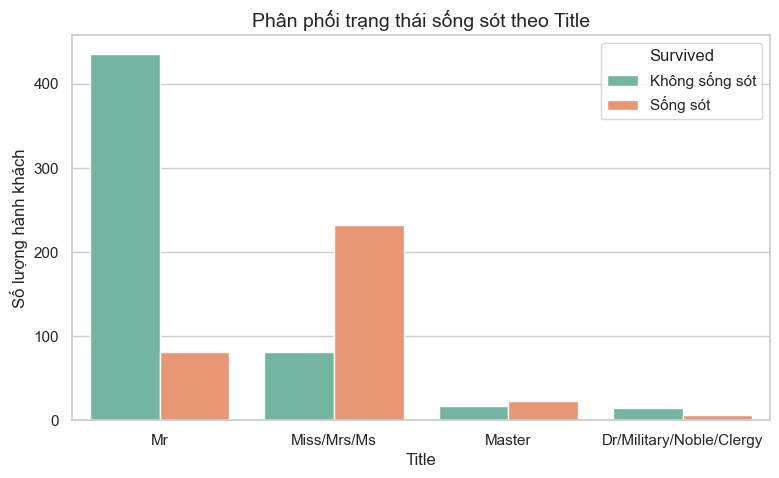

In [201]:
plt.figure(figsize=(9, 5))
sns.countplot(
    data=train_data,
    x="Title",
    hue="Survived",
    palette="Set2",
    order=train_data["Title"].value_counts().index
)

plt.title("Phân phối trạng thái sống sót theo Title", fontsize=14)
plt.xlabel("Title")
plt.ylabel("Số lượng hành khách")
plt.legend(title="Survived", labels=["Không sống sót", "Sống sót"])
plt.show()

In [202]:
test_data[test_data['Age'].isna()][['Title', 'Age']].sample(10)

,Title,Age
256,Mr,NaN
58,Mr,NaN
199,Miss/Mrs/Ms,NaN
273,Miss/Mrs/Ms,NaN
219,Mr,NaN
413,Mr,NaN
84,Mr,NaN
170,Mr,NaN
357,Mr,NaN
41,Mr,NaN


In [203]:
train_data['Age'] = train_data['Age'].fillna(
    train_data.groupby('Title')['Age'].transform('mean')
)
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())

test_data['Age'] = test_data['Age'].fillna(
    test_data.groupby('Title')['Age'].transform('mean')
)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [204]:
print(test_data.iloc[[10, 22, 29, 33, 344]][['Title', 'Age']])

           Title        Age
10            Mr  32.000000
22   Miss/Mrs/Ms  30.272362
29            Mr  32.000000
33   Miss/Mrs/Ms  30.272362
344       Master   7.406471


In [205]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch'] + 1

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_1128\1326782431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_Size', data=train_data, palette='viridis')


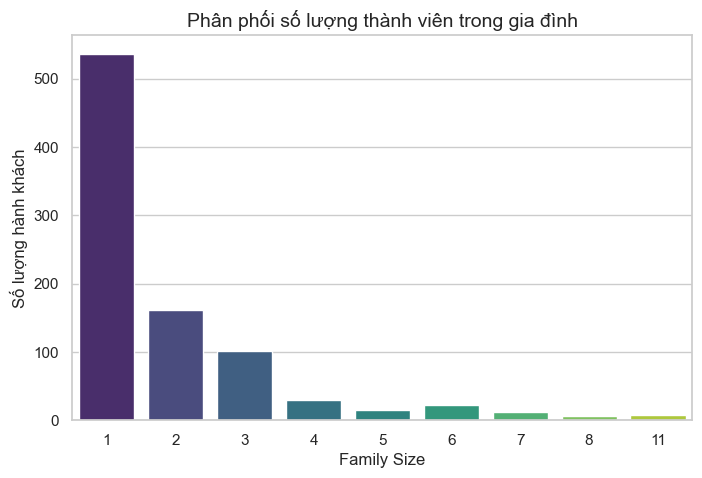

In [206]:
plt.figure(figsize=(8,5))
sns.countplot(x='Family_Size', data=train_data, palette='viridis')

plt.title('Phân phối số lượng thành viên trong gia đình', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.show()

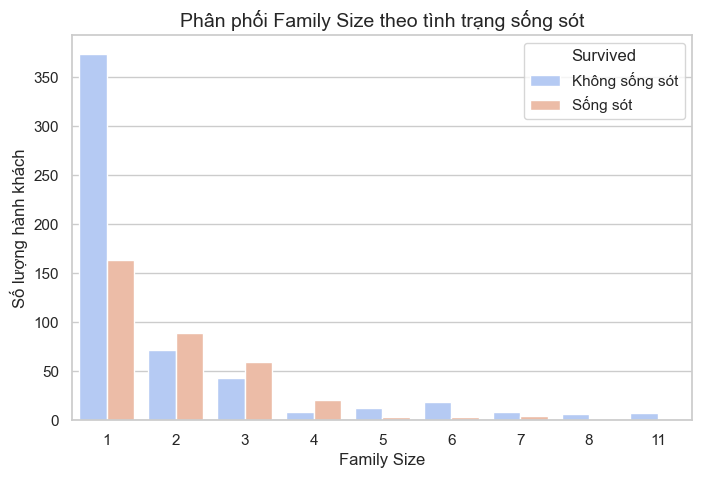

In [207]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Family_Size',
    hue='Survived',
    data=train_data,
    palette='coolwarm'
)

plt.title('Phân phối Family Size theo tình trạng sống sót', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Survived', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [208]:
train_data['Family_Size_Grouped'] = np.select(
    [
        train_data['Family_Size'] == 1,
        train_data['Family_Size'].isin([2, 3, 4]),
        train_data['Family_Size'].isin([5, 6]),
        train_data['Family_Size'].isin([7, 8, 11])
    ],
    ['Single', 'Small', 'Medium', 'Large'],
    default='Other'
)

test_data['Family_Size_Grouped'] = np.select(
    [
        test_data['Family_Size'] == 1,
        test_data['Family_Size'].isin([2, 3, 4]),
        test_data['Family_Size'].isin([5, 6]),
        test_data['Family_Size'].isin([7, 8, 11])
    ],
    ['Single', 'Small', 'Medium', 'Large'],
    default='Other'
)

C:\Users\QUOC VIET\AppData\Local\Temp\ipykernel_1128\1442379951.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_Size_Grouped', data=train_data, palette='viridis')


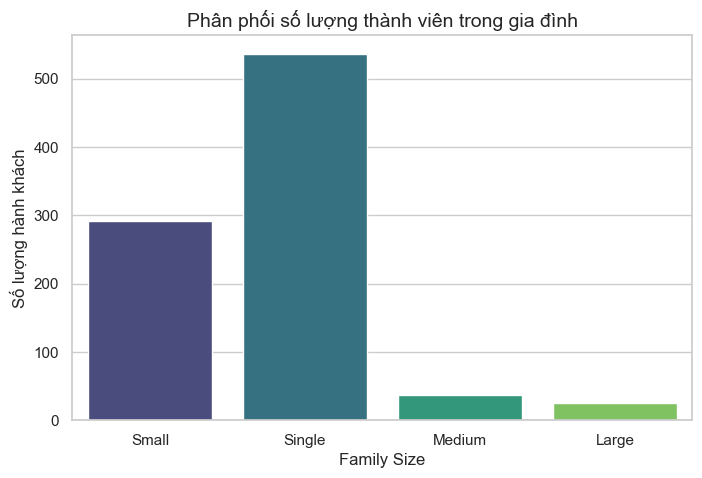

In [209]:
plt.figure(figsize=(8,5))
sns.countplot(x='Family_Size_Grouped', data=train_data, palette='viridis')

plt.title('Phân phối số lượng thành viên trong gia đình', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.show()

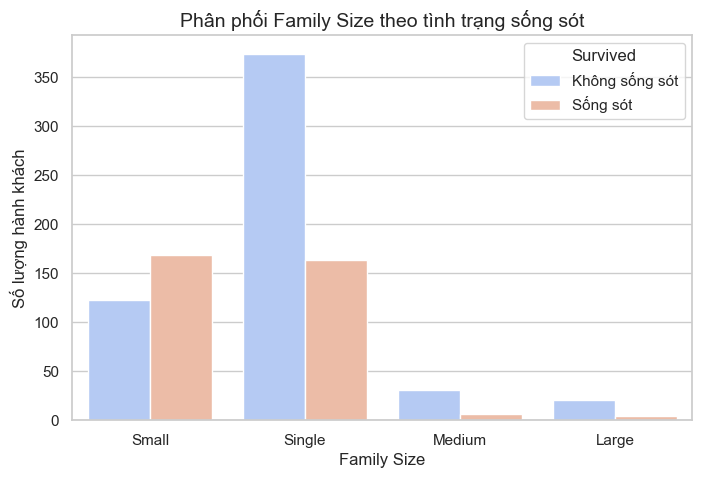

In [210]:
plt.figure(figsize=(8,5))
sns.countplot(
    x='Family_Size_Grouped',
    hue='Survived',
    data=train_data,
    palette='coolwarm'
)

plt.title('Phân phối Family Size theo tình trạng sống sót', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Survived', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [211]:
train_data["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [212]:
train_data["Ticket_Counts"] = train_data.groupby('Ticket')['Ticket'].transform('count')
test_data["Ticket_Counts"] = test_data.groupby('Ticket')['Ticket'].transform('count')

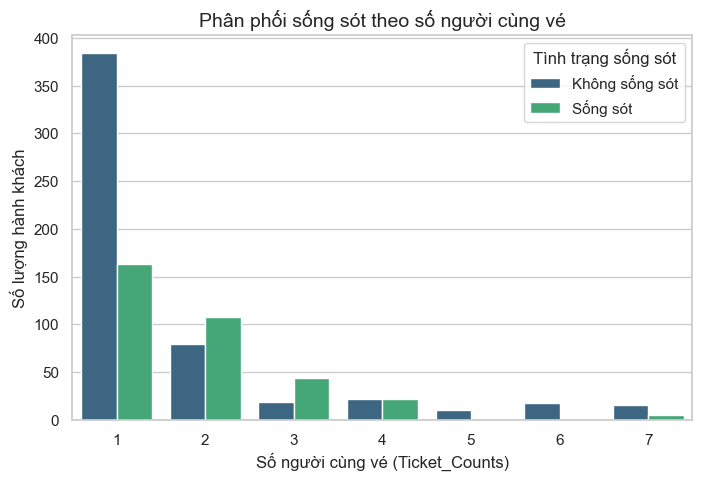

In [213]:
train_data["Ticket_Counts"] = train_data.groupby('Ticket')['Ticket'].transform('count')

plt.figure(figsize=(8,5))
sns.countplot(
    x='Ticket_Counts',
    hue='Survived',
    data=train_data,
    palette='viridis'
)

plt.title('Phân phối sống sót theo số người cùng vé', fontsize=14)
plt.xlabel('Số người cùng vé (Ticket_Counts)', fontsize=12)
plt.ylabel('Số lượng hành khách', fontsize=12)
plt.legend(title='Tình trạng sống sót', labels=['Không sống sót', 'Sống sót'])
plt.show()

In [214]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

train_data = pd.get_dummies(train_data, columns=['Deck'])
test_data = pd.get_dummies(test_data, columns=['Deck'])

train_data = pd.get_dummies(train_data, columns=['Title'])
test_data = pd.get_dummies(test_data, columns=['Title'])

train_data = pd.get_dummies(train_data, columns=['Family_Size_Grouped'])
test_data = pd.get_dummies(test_data, columns=['Family_Size_Grouped'])

In [215]:
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

train_data.drop(columns=['Name', "Ticket"], inplace=True)
test_data.drop(columns=['Name', "Ticket"], inplace=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Family_Size'}>,
        <Axes: title={'center': 'Ticket_Counts'}>]], dtype=object)

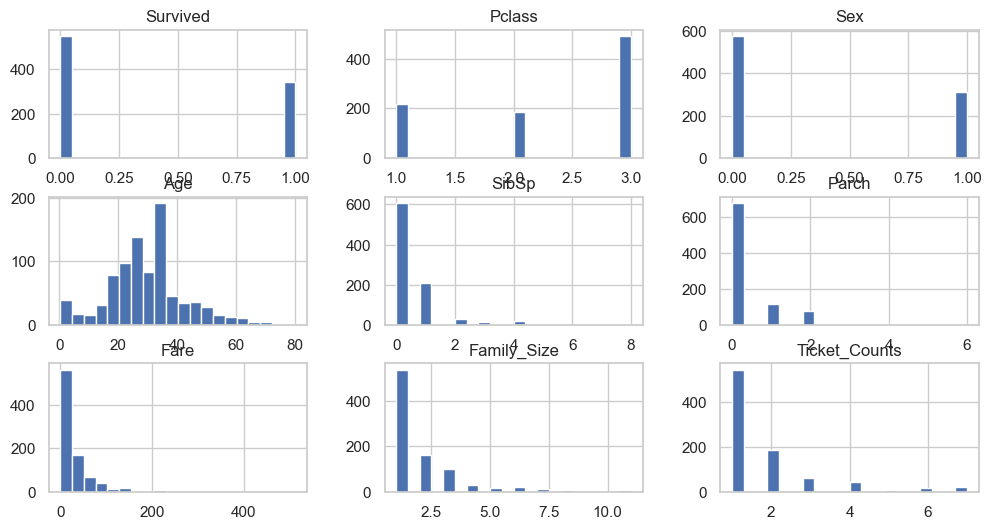

In [216]:
train_data.hist(figsize=(12, 6), bins = 20, sharex = False, sharey = False)

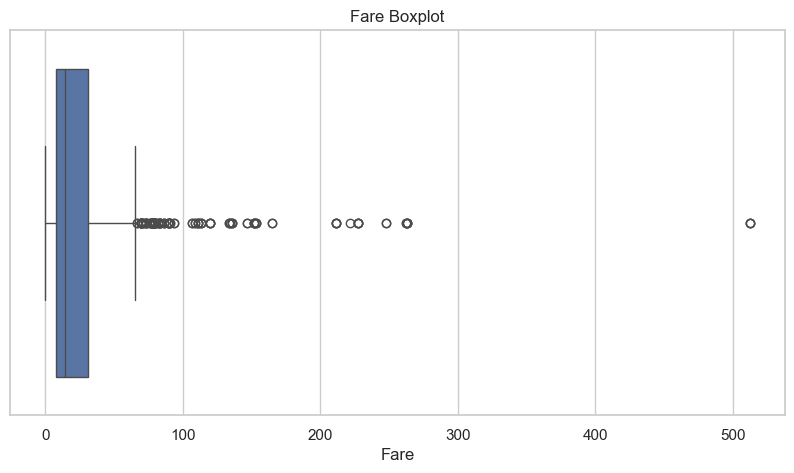

In [217]:
plt.figure(figsize=(10,5))
sns.boxplot(x=train_data['Fare'])
plt.title('Fare Boxplot')
plt.show()

In [218]:
train_data['Fare'] = train_data['Fare'].apply(np.log1p)
test_data['Fare'] = test_data['Fare'].apply(np.log1p)

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Fare']:
    train_data[col] = scaler.fit_transform(train_data[[col]])
    test_data[col] = scaler.transform(test_data[[col]])


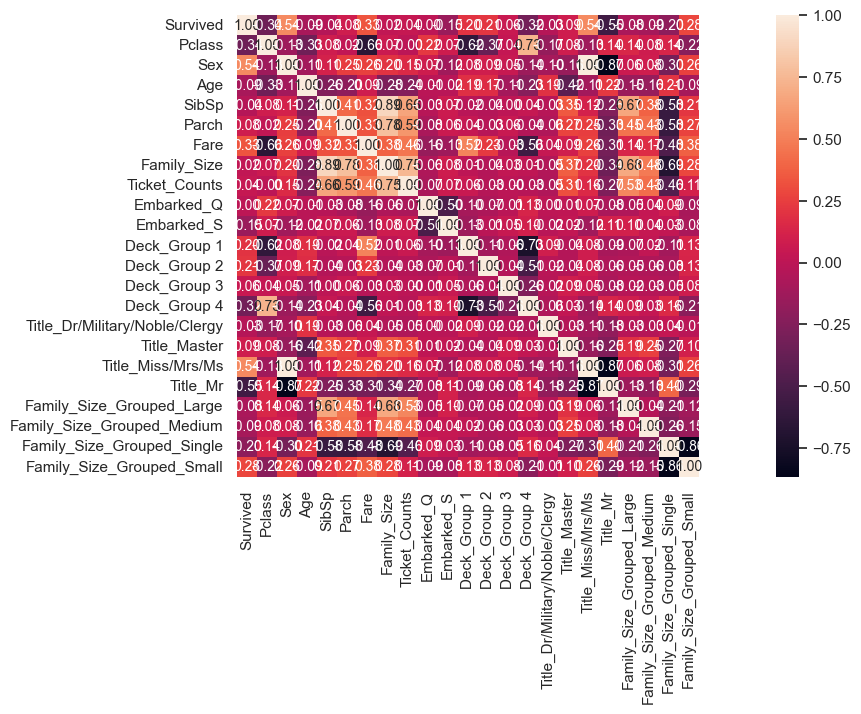

In [220]:
from sklearn.model_selection import train_test_split

X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

corrMat = train_data.corr()
plt.subplots(figsize=(20, 6))
sns.heatmap(corrMat, annot = True, fmt='.2f', annot_kws={'size': 10}, vmax=1.0, square=True)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


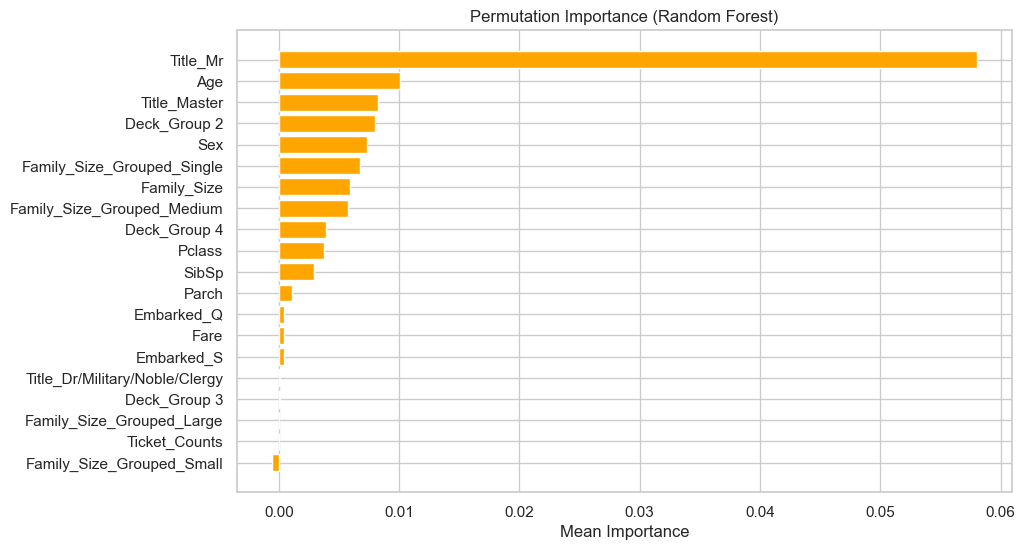

Logistic Regression Results:
  Accuracy: 0.8380
  F1 Score: 0.7883
  ROC AUC:  0.8626
------------------------------


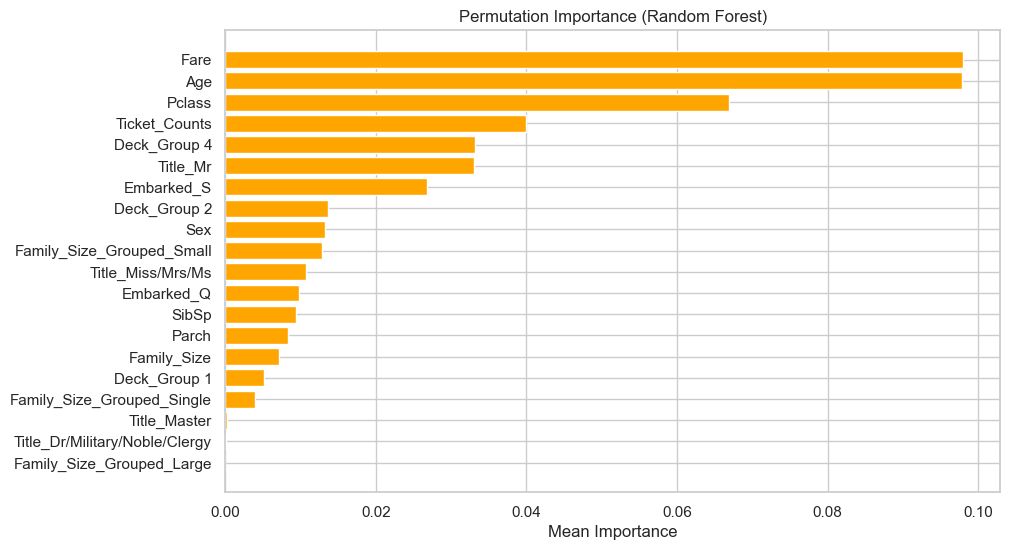

Random Forest Results:
  Accuracy: 0.7933
  F1 Score: 0.7132
  ROC AUC:  0.8469
------------------------------


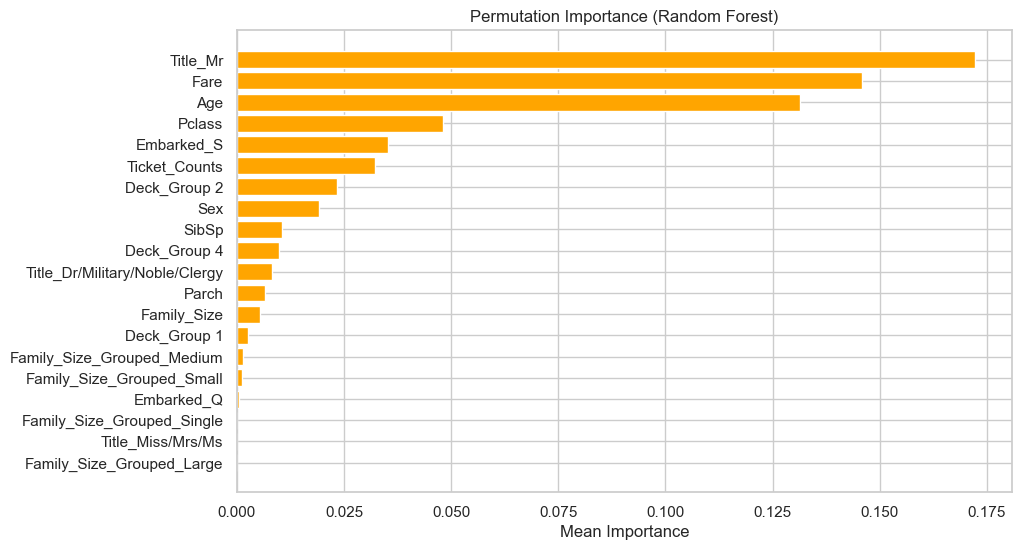

XGBoost Results:
  Accuracy: 0.7821
  F1 Score: 0.7111
  ROC AUC:  0.8240
------------------------------


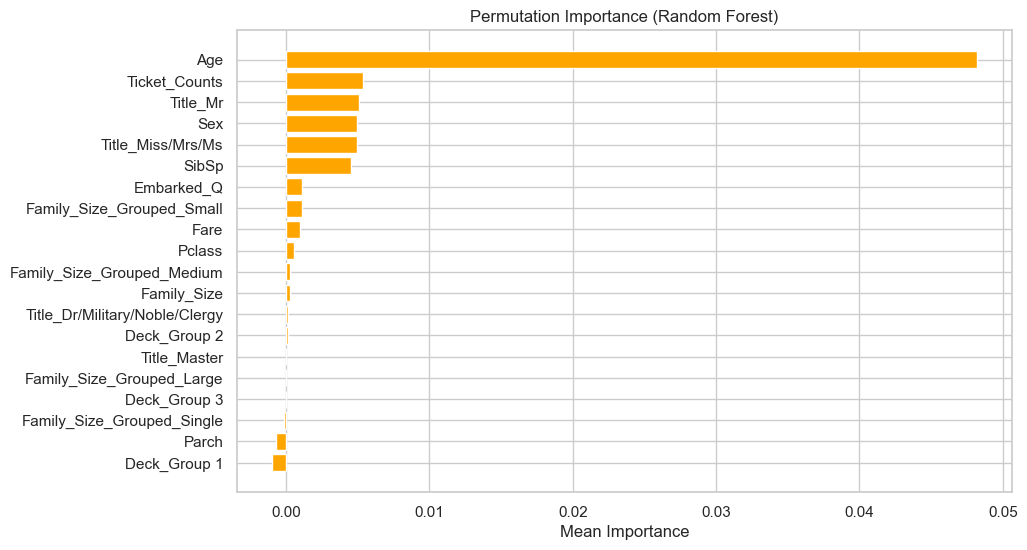

SVC Results:
  Accuracy: 0.7095
  F1 Score: 0.4348
  ROC AUC:  0.8195
------------------------------


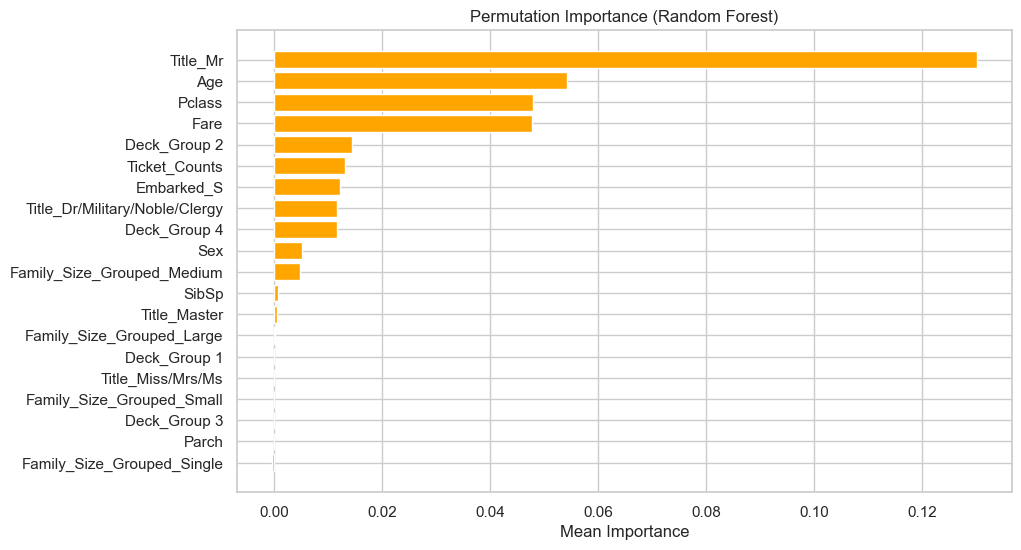

Gradient Boosting Results:
  Accuracy: 0.8101
  F1 Score: 0.7302
  ROC AUC:  0.8452
------------------------------
0:	learn: 0.6740265	total: 2.1ms	remaining: 2.1s
100:	learn: 0.3330211	total: 197ms	remaining: 1.75s
200:	learn: 0.2908389	total: 383ms	remaining: 1.52s
300:	learn: 0.2635144	total: 578ms	remaining: 1.34s
400:	learn: 0.2328817	total: 763ms	remaining: 1.14s
500:	learn: 0.2074987	total: 955ms	remaining: 951ms
600:	learn: 0.1890321	total: 1.15s	remaining: 765ms
700:	learn: 0.1728116	total: 1.33s	remaining: 567ms
800:	learn: 0.1574598	total: 1.51s	remaining: 375ms
900:	learn: 0.1454668	total: 1.69s	remaining: 186ms
999:	learn: 0.1369261	total: 1.86s	remaining: 0us


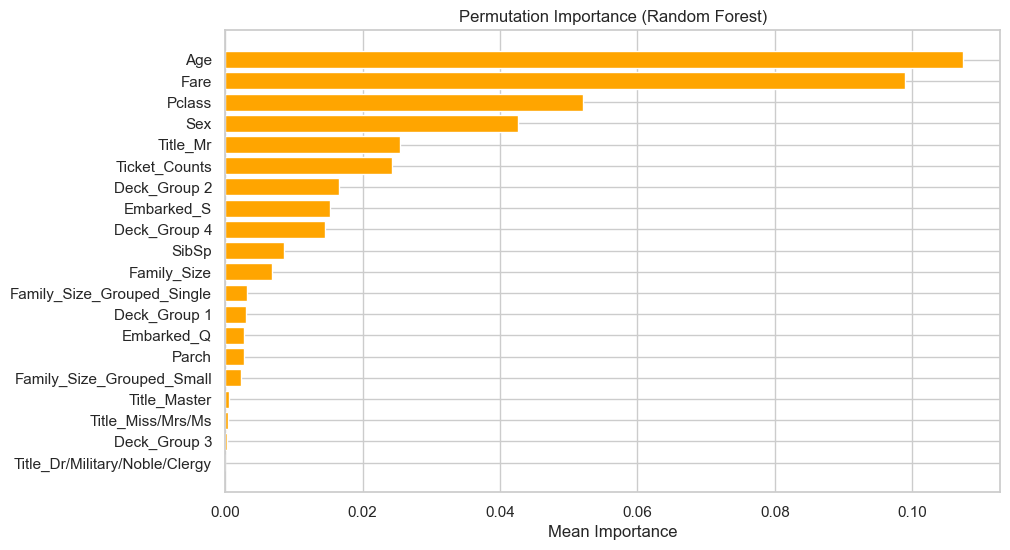

Cat Boost Results:
  Accuracy: 0.8045
  F1 Score: 0.7287
  ROC AUC:  0.8509
------------------------------


In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from catboost import CatBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, n_jobs=-1),
    "SVC": SVC(
        kernel="rbf",     
        probability=True,
        random_state=42,
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,     
        learning_rate=0.05,  
        max_depth=3,   
        random_state=42
    ),
    "Cat Boost": CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=4,
        random_state=42,
        loss_function='Logloss',
        verbose=100
    )
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:,1]
    
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(X_train.columns[sorted_idx][-20:], result.importances_mean[sorted_idx][-20:], color='orange')
    plt.title("Permutation Importance (Random Forest)")
    plt.xlabel("Mean Importance")
    plt.show()

    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    print(f"{name} Results:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC:  {roc_auc:.4f}")
    print("-" * 30)

In [222]:
best_model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.03,
        depth=6,
        l2_leaf_reg=4,
        random_state=42,
        loss_function='Logloss',
        verbose=100
    )
best_model.fit(X_train, y_train)

y_val_pred = best_model.predict(X_val)

print("Actual values (first 10):")
print(y_val.head(10))

print("\nPredicted values (first 10):")
print(pd.Series(y_val_pred).head(10))


0:	learn: 0.6740265	total: 2.41ms	remaining: 2.41s
100:	learn: 0.3330211	total: 226ms	remaining: 2.01s
200:	learn: 0.2908389	total: 440ms	remaining: 1.75s
300:	learn: 0.2635144	total: 672ms	remaining: 1.56s
400:	learn: 0.2328817	total: 884ms	remaining: 1.32s
500:	learn: 0.2074987	total: 1.09s	remaining: 1.09s
600:	learn: 0.1890321	total: 1.3s	remaining: 867ms
700:	learn: 0.1728116	total: 1.5s	remaining: 642ms
800:	learn: 0.1574598	total: 1.7s	remaining: 424ms
900:	learn: 0.1454668	total: 1.9s	remaining: 209ms
999:	learn: 0.1369261	total: 2.1s	remaining: 0us
Actual values (first 10):
565    0
160    0
553    1
860    0
241    1
559    1
387    1
536    0
698    0
99     0
Name: Survived, dtype: int64

Predicted values (first 10):
0    0
1    0
2    0
3    0
4    1
5    0
6    1
7    1
8    1
9    0
dtype: int64


In [223]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[97 13]
 [22 47]]


In [224]:
# Re-create the original dataset.
test_data_orig = pd.read_csv("./kaggle/input/titanic/test.csv")

# Get the predicted data from test
test_preds = best_model.predict(test_data)

# Create a submission dataframe
submission = pd.DataFrame({
    "PassengerId": test_data_orig["PassengerId"],
    "Survived": test_preds
})

# Export to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created.")

Submission file 'submission.csv' created.
